In [64]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [27]:
df = pd.read_csv('C:/Users/USER/Desktop/data science AFRICDSA/Datasets/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


Data source courtesy of Kaggle.com

In [28]:
#Getting the columns of the dataset

for i in df.columns:
    print(i)

User ID
Device Model
Operating System
App Usage Time (min/day)
Screen On Time (hours/day)
Battery Drain (mAh/day)
Number of Apps Installed
Data Usage (MB/day)
Age
Gender
User Behavior Class


In [29]:
#Checking for the shape of the data

df.shape

(700, 11)

In [30]:
#Checking for nulls

df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

No nulls

In [31]:
#Checking for duplicates

df.duplicated().sum()

0

No duplicates

In [32]:
#Checking the datatypes

df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

All data types are as required

In [33]:
#Describing the data

df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [34]:
#Picking the useful columns

df.drop(columns= 'User ID', inplace = True)
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<Axes: >

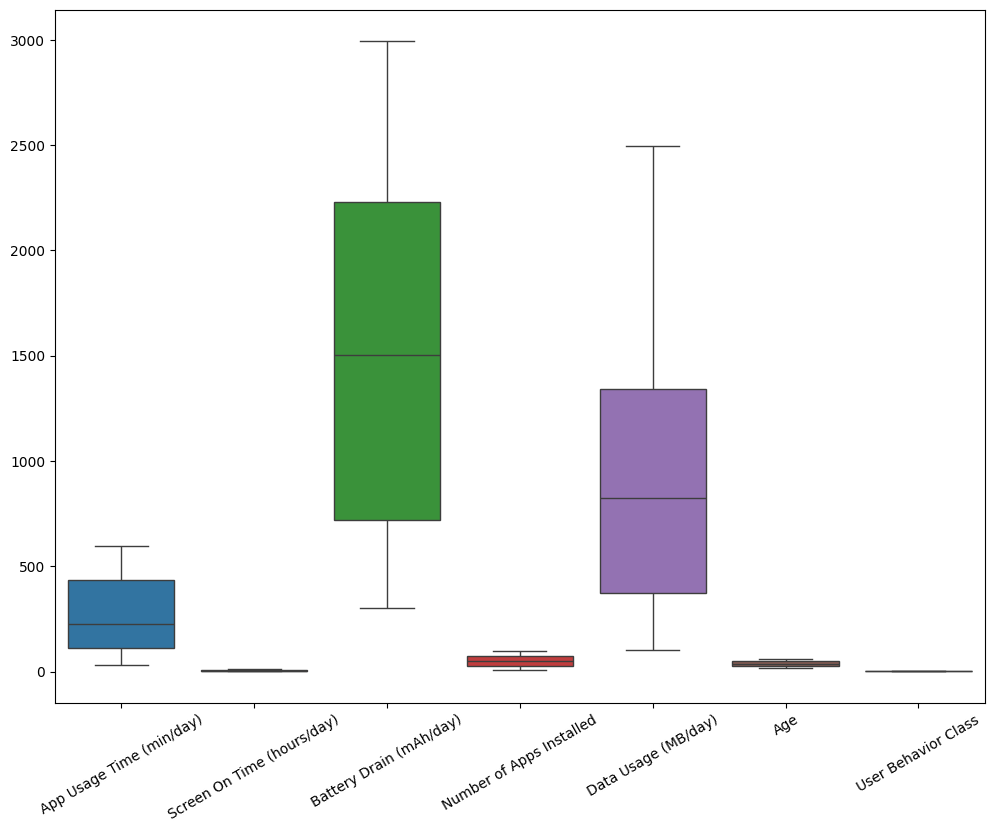

In [37]:
#Checking for outliers

plt.figure(figsize = (12,9))
plt.xticks(rotation = 30)
sns.boxplot(df)

No outliers in the df

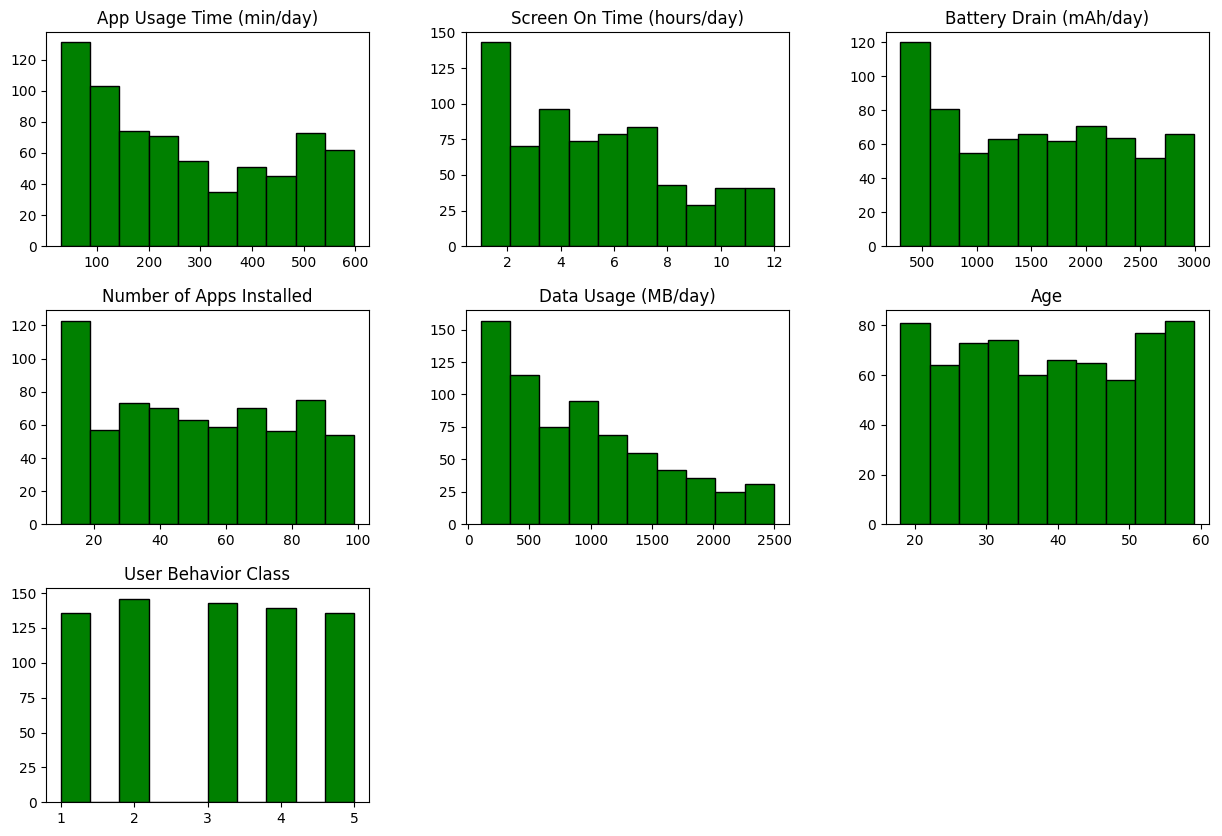

In [42]:
#Checking the distribution of the data

plt.rcParams['figure.figsize'] = (15,10)
df.hist(grid = False, edgecolor = 'black', color = 'green')
plt.show()

In [52]:
#Checking for relationships between the data

corr_matrix = df.corr()
corr_matrix

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
Device Model,1.000000,0.707477,0.021657,0.035581,0.040976,0.029720,0.036759,0.015390,-0.033846,0.037970
Operating System,0.707477,1.000000,0.031577,0.026470,0.040361,0.038984,0.028687,0.020358,-0.027589,0.041326
App Usage Time (min/day),0.021657,0.031577,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,-0.004551,0.970498
Screen On Time (hours/day),0.035581,0.026470,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.003573,0.964581
Battery Drain (mAh/day),0.040976,0.040361,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.006271,0.978587
Number of Apps Installed,0.029720,0.038984,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.016245,0.981255
Data Usage (MB/day),0.036759,0.028687,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.023151,0.946734
Age,0.015390,0.020358,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,0.006965,-0.000563
Gender,-0.033846,-0.027589,-0.004551,0.003573,0.006271,0.016245,0.023151,0.006965,1.000000,-0.000735
User Behavior Class,0.037970,0.041326,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,-0.000735,1.000000


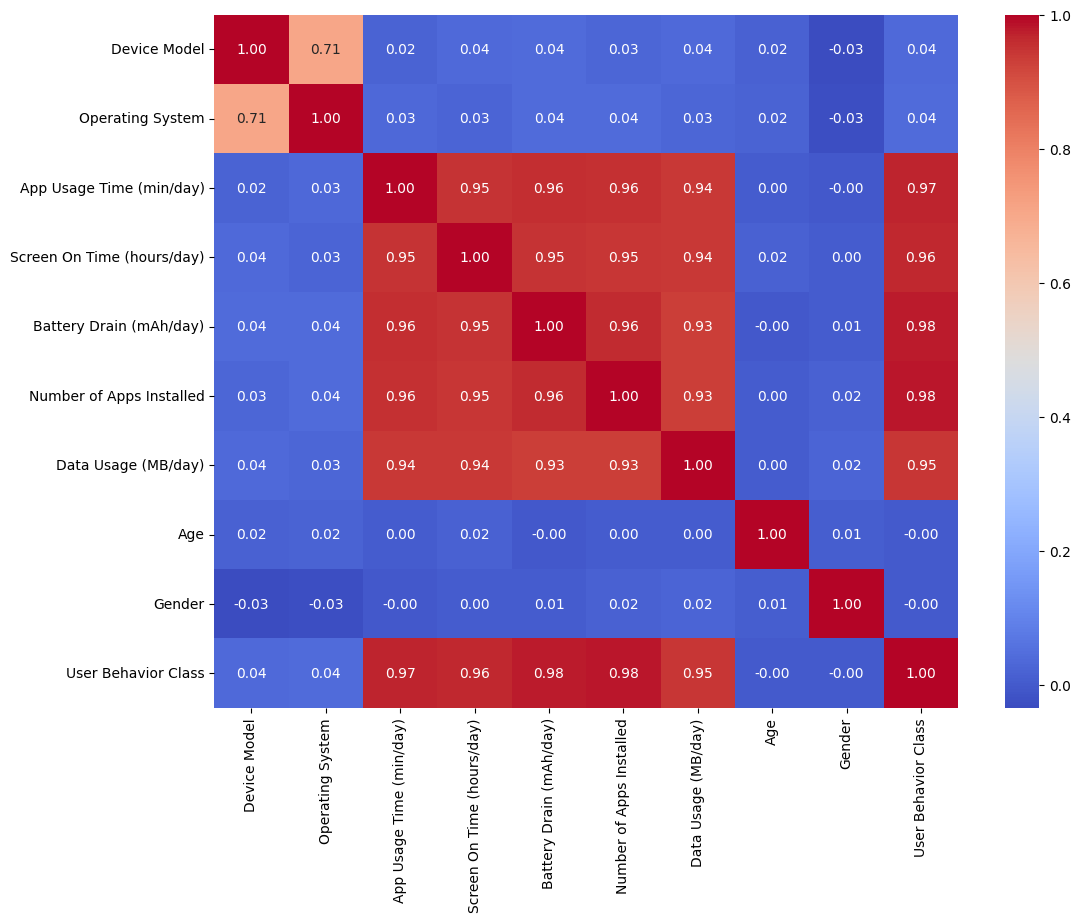

In [54]:
#Visualizing the correlation matrix using a heatmap

plt.figure(figsize = (12,9))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

App usage, Screen on time, Battery drain, Number of apps, and data usage have a very high positive correlation with user behavious class, each of them having at least a correlation of 0.95. They they are good metrics that can be used to determine user behavior.

In [55]:
#Changing categorical columns to integers

df['Device Model'] = df['Device Model'].astype('category').cat.codes
df['Operating System'] = df['Operating System'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    int8   
 1   Operating System            700 non-null    int8   
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    int8   
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), int8(3)
memory usage: 40.5 KB


All categorical columns are now integers

In [63]:
#Feature Engineering

x = df[['Device Model','Operating System','App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)','Age','Gender']]
y = df['User Behavior Class']

#splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Getting the model

model = DecisionTreeClassifier()

#Fitting and training the model

model.fit(x_train, y_train)

#Making predictions

y_predict = model.predict(x_test)

#Checking the accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print('The accuracy of the model is = ', round(accuracy*100,2), '%')

#Getting the confusion matrix

matrix = confusion_matrix(y_predict, y_test)
print('\nThe confusion matrix of the model:\n ', matrix)

The accuracy of the model is =  100.0 %

The confusion matrix of the model:
  [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


The model is seen to have a perfect score using decision tree classifier model